<a href="https://colab.research.google.com/github/RudiksChess/UVG-DataScience-Notas-6-Semestre/blob/main/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad del Valle de Guatemala**
##### Departamento de Computación - Data Science I - Catedrático: Luis Furlán
---
#### **Estudiante:** Rudik Roberto Rompich 
#### **Carrera:** Licenciatura en Matemática Aplicada 
#### **Carné:** 19857
---
# **Laboratorio 2**
### Fecha de entrega: ***8 de agosto de 2021***

---

 **Instrucciones:**

> Adjunto a este NoteBook encontrarán el archivo *Autos-csv* que contiene datos sobre automóviles de segunda mano.  El objetivo principal de este ejercicio es desarrollar un modelo que permita, en base a las características (features) que tiene el archivo, predecir el costo de un vehículo usado.

> A diferencia de la mayoría de ejercicios, este archivo no ha sido depurado, es decir los datos son crudos (raw).  Esto quiere decir que antes de trabajar sobre un modelo predictivo, deben realizar el proceso total, desde limpieza de datos, exploración inicial, etc.

> A continuación encontrarán que hay encabezados que bien podrían ayudarlos a desarrollar el código requerido.  Estos están a manera de sugerencia únicamente y ustedes decidirán si los usan, modifican, eliminan, agregan a los mismos.




>> **Importar las librerías relevantes**

In [526]:
import pandas as pd 
import seaborn as sns

>> **Pandas_Profiling.**
Es necesario importar la última versión de este *software* para que no se genere ningún error.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

>> **QuickDA.**
Es necesario importarlo ya que no es una de las librerías que vienen por defecto.

In [ ]:
! pip install quickda

In [524]:
from pandas_profiling import ProfileReport
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

>> **Cargar los datos crudos**

In [525]:
datos_url= "https://raw.githubusercontent.com/RudiksChess/UVG-DataScience-Notas-6-Semestre/main/Lab2/Autos.csv"
datos = pd.read_csv(datos_url)
datos

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocesamiento

### Explorar las estadísticas descriptivas de las variables

In [528]:
reporte_preliminar = ProfileReport(datos)
reporte_preliminar.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Determinación de las variables de interés

In [529]:
explore(datos)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
Body,object,4345,0,0.000,6,crossover,-,-,-,van,-,-,-,-
Brand,object,4345,0,0.000,7,Audi,-,-,-,Volkswagen,-,-,-,-
Engine Type,object,4345,0,0.000,4,Diesel,-,-,-,Petrol,-,-,-,-
EngineV,float64,4195,150,0.035,73,0.6,1.8,2.2,3,99.99,2.79073,2.2,5.06644,16.8906
Mileage,int64,4345,0,0.000,410,0,86,155,230,980,161.237,155,105.706,0.808364
Model,object,4345,0,0.000,312,1 Series,-,-,-,Z4,-,-,-,-
Price,float64,4173,172,0.040,906,600,6999,11500,21700,300000,19418.7,11500,25584.2,4.45208
Registration,object,4345,0,0.000,2,no,-,-,-,yes,-,-,-,-
Year,int64,4345,0,0.000,39,1969,2003,2008,2012,2016,2006.55,2008,6.7191,-0.951043


In [530]:
datos = clean(datos, method = 'dtypes', columns = ["Body","Brand","Engine Type", "Model", "Registration"], 
              dtype='category')
datos = clean(datos, method = "standardize")
datos = clean(datos, method = "duplicates")

### Manejo de valores faltantes

In [531]:
datos = clean(datos, method = "fillmissing") 

In [532]:
explore(datos)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
body,category,4272,0,0.0,6,-,-,-,-,-,-,-,-,-
brand,category,4272,0,0.0,7,-,-,-,-,-,-,-,-,-
engine_type,category,4272,0,0.0,4,-,-,-,-,-,-,-,-,-
enginev,float64,4272,0,0.0,73,0.6,1.8,2.2,3,99.99,2.77516,2.2,5.02185,17.0408
mileage,int64,4272,0,0.0,410,0,90,157,230,980,163.208,157,105.16,0.817792
model,category,4272,0,0.0,312,-,-,-,-,-,-,-,-,-
price,float64,4272,0,0.0,906,600,6900,11200,21000,300000,18917.7,11200,24855.3,4.55363
registration,category,4272,0,0.0,2,-,-,-,-,-,-,-,-,-
year,int64,4272,0,0.0,39,1969,2003,2008,2012,2016,2006.42,2008,6.69426,-0.951301


### Exploración de las Funciones de Distribución de Probabilidades (PDFs por sus siglas en inglés)

Outlier Analysis - Boxplot


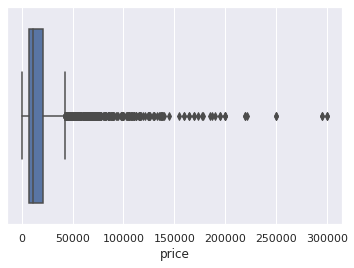

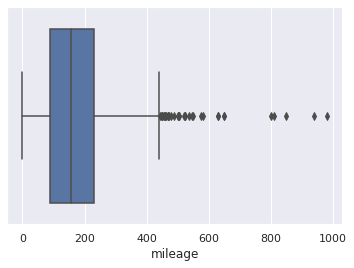

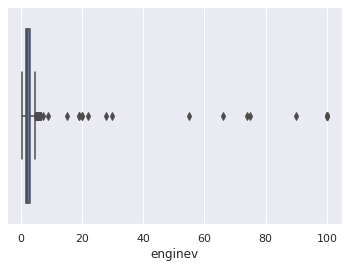

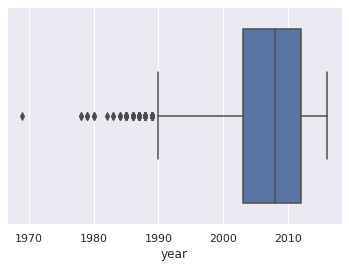

Distribution Analysis - Histogram


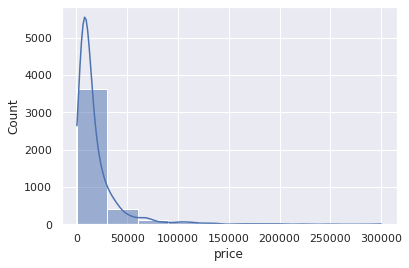

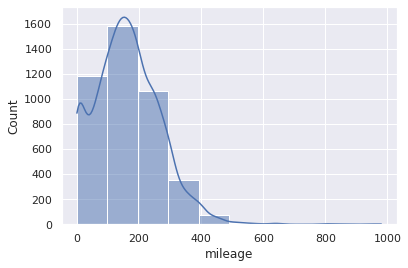

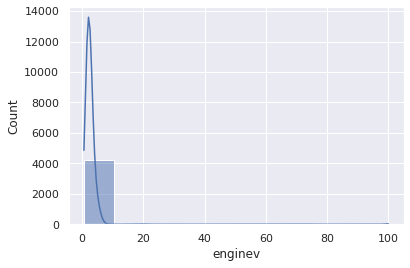

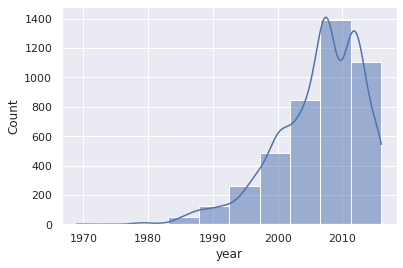

In [533]:
eda_num(datos)

### Manejo de valores atípicos (outliers)

In [534]:
datos= clean(datos, method="outliers")

Outlier Analysis - Boxplot


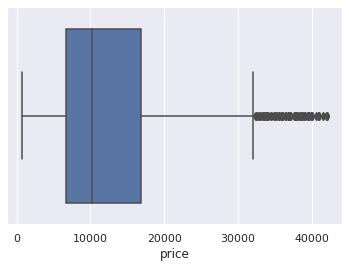

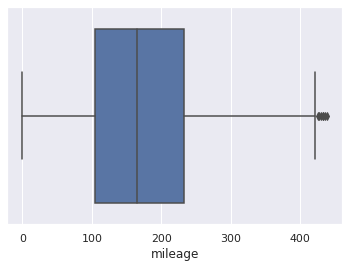

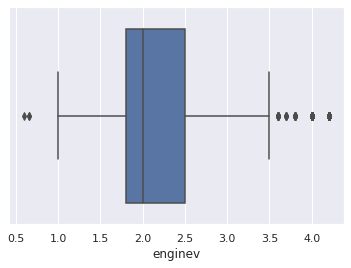

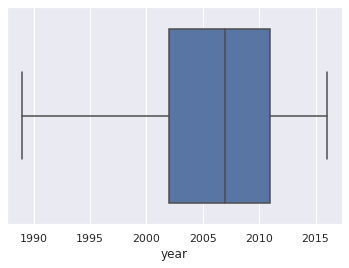

Distribution Analysis - Histogram


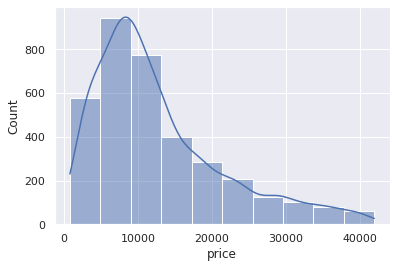

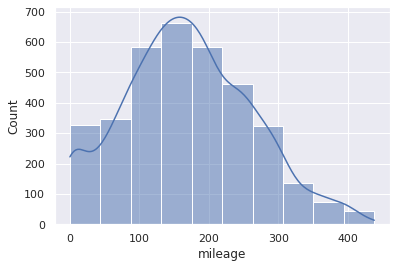

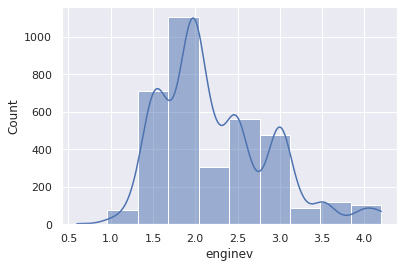

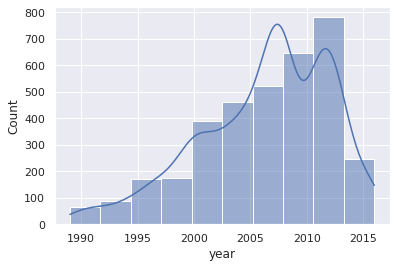

In [535]:
eda_num(datos)

## Crear variables comodín (Dummy)

In [536]:
nodummies = datos
datos = pd.get_dummies(datos)

### Re-ordenar un poco

In [537]:
datos= datos.reset_index(drop=True)
datos

,price,mileage,enginev,year,brand_Audi,brand_BMW,brand_Mercedes-Benz,brand_Mitsubishi,brand_Renault,brand_Toyota,brand_Volkswagen,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engine_type_Diesel,engine_type_Gas,engine_type_Other,engine_type_Petrol,registration_no,registration_yes,model_1 Series,model_100,model_11,model_116,model_118,model_120,model_19,model_190,model_200,model_21,model_210,model_220,model_230,model_25,model_250,model_300,model_316,...,model_Sprinter 315,model_Sprinter 316,model_Sprinter 318,model_Sprinter 319,model_Sprinter 324,model_Symbol,model_Syncro,model_T2 (Transporter),model_T3 (Transporter),model_T4 (Transporter),model_T4 (Transporter),model_T5 (Transporter),model_T5 (Transporter),model_T6 (Transporter),model_T6 (Transporter),model_TT,model_Tacoma,model_Tiguan,model_Touareg,model_Touran,model_Trafic,model_Tundra,model_Up,model_V 250,model_Vaneo,model_Vento,model_Venza,model_Viano,model_Virage,model_Vista,model_Vito,model_X1,model_X3,model_X5,model_X5 M,model_X6,model_X6 M,model_Yaris,model_Z3,model_Z4
0,4200.0,277,2.0,1991,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23000.0,240,4.2,2007,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18300.0,120,2.0,2011,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6100.0,438,2.0,1997,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,11500.0,163,2.5,2008,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3540,17900.0,35,1.6,2014,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3541,6500.0,1,3.5,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3542,14200.0,31,2.0,2014,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelo de regresión lineal

### Declarar las entradas y las metas

In [538]:
datos.columns

Index(['price', 'mileage', 'enginev', 'year', 'brand_Audi', 'brand_BMW',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Renault',
       'brand_Toyota',
       ...
       'model_Vito', 'model_X1', 'model_X3', 'model_X5', 'model_X5 M',
       'model_X6', 'model_X6 M', 'model_Yaris', 'model_Z3', 'model_Z4'],
      dtype='object', length=335)

In [539]:
X = list(datos.columns.values)
X.remove("price")
X = datos[X]
y= 'price'

### Escalar (poner a escala) los datos

In [540]:
columnas= list(datos.columns.values)
variables_numericas = datos[columnas]

from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit(variables_numericas)
cols_std = escalador.transform(variables_numericas)
df_std = pd.DataFrame(cols_std, columns=columnas)
df_std

,price,mileage,enginev,year,brand_Audi,brand_BMW,brand_Mercedes-Benz,brand_Mitsubishi,brand_Renault,brand_Toyota,brand_Volkswagen,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engine_type_Diesel,engine_type_Gas,engine_type_Other,engine_type_Petrol,registration_no,registration_yes,model_1 Series,model_100,model_11,model_116,model_118,model_120,model_19,model_190,model_200,model_21,model_210,model_220,model_230,model_25,model_250,model_300,model_316,...,model_Sprinter 315,model_Sprinter 316,model_Sprinter 318,model_Sprinter 319,model_Sprinter 324,model_Symbol,model_Syncro,model_T2 (Transporter),model_T3 (Transporter),model_T4 (Transporter),model_T4 (Transporter),model_T5 (Transporter),model_T5 (Transporter),model_T6 (Transporter),model_T6 (Transporter),model_TT,model_Tacoma,model_Tiguan,model_Touareg,model_Touran,model_Trafic,model_Tundra,model_Up,model_V 250,model_Vaneo,model_Vento,model_Venza,model_Viano,model_Virage,model_Vista,model_Vito,model_X1,model_X3,model_X5,model_X5 M,model_X6,model_X6 M,model_Yaris,model_Z3,model_Z4
0,-0.975870,1.163852,-0.363210,-2.593501,-0.350629,2.505436,-0.449634,-0.313965,-0.380398,-0.380398,-0.565620,-0.430447,-0.282541,-0.326286,1.253732,-0.350629,-0.460926,-0.941867,-0.415612,-0.190414,1.369899,-0.347577,0.347577,-0.0168,-0.065196,0.0,-0.029107,-0.037588,-0.0168,-0.023762,-0.023762,-0.033615,0.0,-0.023762,-0.023762,-0.0168,0.0,-0.0168,0.0,-0.047565,...,-0.0168,-0.029107,-0.023762,-0.0168,0.0,-0.055799,-0.0168,0.0,0.0,-0.105484,-0.047565,-0.132339,-0.105484,-0.037588,-0.047565,-0.037588,-0.029107,-0.069426,-0.118406,-0.073417,-0.148036,0.0,-0.023762,-0.029107,-0.0168,-0.041181,-0.044487,-0.041181,-0.0168,-0.0168,-0.218153,-0.050458,-0.041181,-0.12439,-0.0168,-0.069426,0.0,-0.062976,-0.0168,-0.029107
1,-0.554998,2.790996,1.017478,-1.232397,-0.350629,-0.399132,2.224030,-0.313965,-0.380398,-0.380398,-0.565620,-0.430447,-0.282541,-0.326286,-0.797619,-0.350629,2.169545,1.061721,-0.415612,-0.190414,-0.729981,-0.347577,0.347577,-0.0168,-0.065196,0.0,-0.029107,-0.037588,-0.0168,-0.023762,-0.023762,-0.033615,0.0,-0.023762,-0.023762,-0.0168,0.0,-0.0168,0.0,-0.047565,...,-0.0168,-0.029107,-0.023762,-0.0168,0.0,-0.055799,-0.0168,0.0,0.0,-0.105484,-0.047565,-0.132339,-0.105484,-0.037588,-0.047565,-0.037588,-0.029107,-0.069426,-0.118406,-0.073417,-0.148036,0.0,-0.023762,-0.029107,-0.0168,-0.041181,-0.044487,-0.041181,-0.0168,-0.0168,-0.218153,-0.050458,-0.041181,-0.12439,-0.0168,-0.069426,0.0,-0.062976,-0.0168,-0.029107
2,1.162618,0.762490,3.011803,0.128708,2.852020,-0.399132,-0.449634,-0.313965,-0.380398,-0.380398,-0.565620,2.323169,-0.282541,-0.326286,-0.797619,-0.350629,-0.460926,-0.941867,-0.415612,-0.190414,1.369899,-0.347577,0.347577,-0.0168,-0.065196,0.0,-0.029107,-0.037588,-0.0168,-0.023762,-0.023762,-0.033615,0.0,-0.023762,-0.023762,-0.0168,0.0,-0.0168,0.0,-0.047565,...,-0.0168,-0.029107,-0.023762,-0.0168,0.0,-0.055799,-0.0168,0.0,0.0,-0.105484,-0.047565,-0.132339,-0.105484,-0.037588,-0.047565,-0.037588,-0.029107,-0.069426,-0.118406,-0.073417,-0.148036,0.0,-0.023762,-0.029107,-0.0168,-0.041181,-0.044487,-0.041181,-0.0168,-0.0168,-0.218153,-0.050458,-0.041181,-0.12439,-0.0168,-0.069426,0.0,-0.062976,-0.0168,-0.029107
3,0.627996,-0.539226,-0.363210,0.809260,-0.350629,-0.399132,-0.449634,-0.313965,-0.380398,2.628824,-0.565620,2.323169,-0.282541,-0.326286,-0.797619,-0.350629,-0.460926,-0.941867,-0.415612,-0.190414,1.369899,-0.347577,0.347577,-0.0168,-0.065196,0.0,-0.029107,-0.037588,-0.0168,-0.023762,-0.023762,-0.033615,0.0,-0.023762,-0.023762,-0.0168,0.0,-0.0168,0.0,-0.047565,...,-0.0168,-0.029107,-0.023762,-0.0168,0.0,-0.055799,-0.0168,0.0,0.0,-0.105484,-0.047565,-0.132339,-0.105484,-0.037588,-0.047565,-0.037588,-0.029107,-0.069426,-0.118406,-0.073417,-0.148036,0.0,-0.023762,-0.029107,-0.0168,-0.041181,-0.044487,-0.041181,-0.0168,-0.0168,-0.218153,-0.050458,-0.041181,-0.12439,-0.0168,-0.069426,0.0,-0.062976,-0.0168,-0.029107
4,-0.759746,2.910320,-0.363210,-1.572673,-0.350629,2.

### Divisón del df completo en datos de entrenamiento y de prueba (Train Test Split)

In [541]:
X = X
y = datos[y]

In [542]:
from sklearn.model_selection import train_test_split

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Crear la regresión

In [544]:
from sklearn.linear_model import LinearRegression

In [545]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prueba del modelo

In [546]:
predicciones = lm.predict(X_test)

In [547]:
predicciones.shape

(1418,)

### Encontrar R^2 del modelo

In [548]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [549]:
R2 = metrics.r2_score(y_test,predicciones)
R2

0.7297663497182864

Nótese que este no es el R^2 ajustado.  En otras palabras hay que encontrar el R^2 ajustado para tener una medida más adecuada

### Fórmula para R^2 Ajustado

$R^2_{ajust.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = número de observaciones

p = número de predictores

In [550]:
R_ajustado = 1-(1-R2)* (len(datos.index)-1)/(len(datos.index)-len(predicciones)-1)
R_ajustado

0.5494410244950063

### Encontrar los pesos (coeficientes) y el sesgo (intercepto)

In [551]:
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coeficientes

,Coeficiente
mileage,-9.095891
enginev,558.500764
year,965.766981
brand_Audi,4318.426791
brand_BMW,1418.904655
...,...
model_X6,-86.437026
model_X6 M,0.000000
model_Yaris,-12255.916427
model_Z3,1949.466729


In [552]:
lm.intercept_

-1925851.2211539182

## Revisando los supuestos para OLS

In [553]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 3131.568520149649
MSE: 21012638.956636783
RMSE: 4583.954510751256


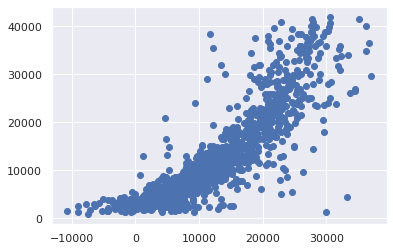

In [554]:
plt.scatter(predicciones,y_test)

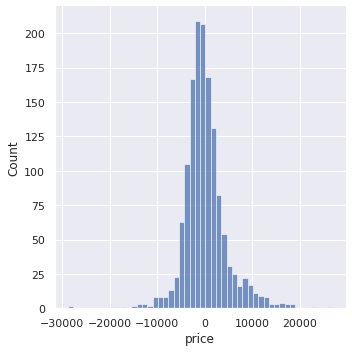

In [555]:
sns.displot((y_test - predicciones),bins=50);

### Multicolinealidad

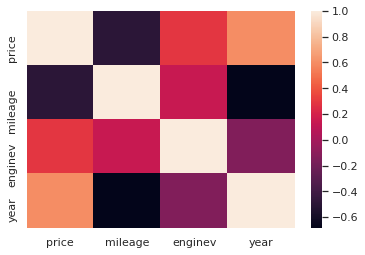

In [581]:
sns.heatmap(nodummies.corr())

### Conclusiones


Nótese que *sklearn* es una librería especializada en *machine learning* y no en estadística como tal; por lo tanto, su función trata en la creación de modelos predictivos dadas una serie de variables y no en la verificación de modelos teóricos ampliamente documentados como es el OLS. Es por esto, que no se ofrece un resumen automático de la regresión lineal. Entonces, la interpretación de los supuestos es el siguiente: 

1.   **Linealidad:** según el test de $R^2$ de sklearn, es de 0.72. Por lo cual, en un sentido teórico, es un modelo un tanto impreciso. Sin embargo, en un sentido práctico, podría predecir bastante bien los nuevos *inputs* que se le adhieran.  
2.   **Independencia y Homostecidad** pueden ser comprobados por las pruebas del MAE, MSE, RSME. 
3. **Normalidad**, según la gráfica de normalidad entre el modelo predictivo y el esperado, forman un distribución. (Aunque esto debería ser comprobado por el test de Jarque-Bera. 
4. **Multicolinealidad**, nótese el gráfico de calor (basado en correlaciones), pareciera ser que las variables categóricas no tienen una correlación fuerte. 

Por lo tanto, se puede concluir que en sentidos prácticos la regresión lineal ejecutada cumple a cabalidad los supuestos del OLS.

